<a href="https://colab.research.google.com/github/sibot89/Data-Science/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
files.upload()

Saving Country Clusters.csv to Country Clusters.csv


{'Country Clusters.csv': b'Country,Latitude,Longitude,Language\r\nUSA,44.97,-103.77,English\r\nCanada,62.4,-96.8,English\r\nFrance,46.75,2.4,French\r\nUK,54.01,-2.53,English\r\nGermany,51.15,10.4,German\r\nAustralia,-25.45,133.11,English\r\n'}

In [ ]:
raw_data = pd.read_csv('Country Clusters.csv')
data = raw_data.copy()
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


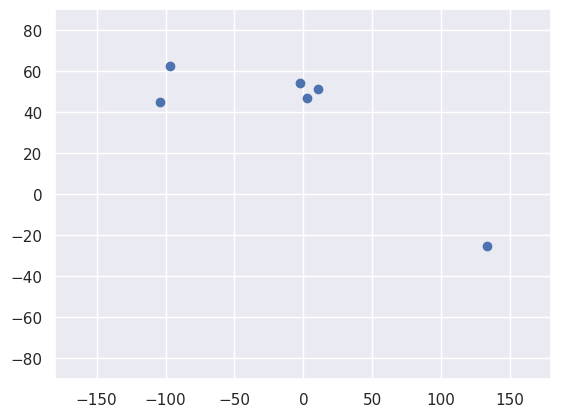

In [ ]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [ ]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [ ]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2], dtype=int32)

In [ ]:
clustered_data = data.copy()
clustered_data['Clusters'] = identified_clusters
clustered_data

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


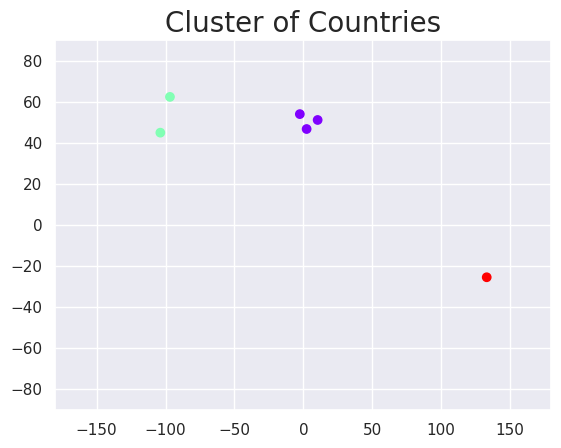

In [ ]:
plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'],
            c=clustered_data['Clusters'], cmap='rainbow')

plt.xlim(-180,180)
plt.ylim(-90,90)

plt.title("Cluster of Countries", size = 20)

plt.show()

Add 'Language' to the featers

In [ ]:
mapped_data = data.copy()
mapped_data['Language'] = mapped_data['Language'].map({'English':0, 'French':1, 'German':2})
mapped_data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [ ]:
x = mapped_data.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [ ]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(x)

identified_clusters

array([1, 1, 0, 0, 0, 2], dtype=int32)

In [ ]:
data_with_clusters = mapped_data.copy()

data_with_clusters['Cluster'] = identified_clusters

data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,2


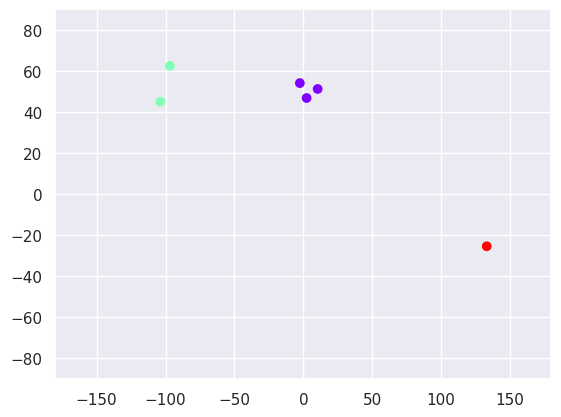

In [ ]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],
            c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [ ]:
kmeans.inertia_

290.10523333333333

Find the best number of clusters with WCSS techniqe

In [ ]:
wcss = []
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'WCSS')

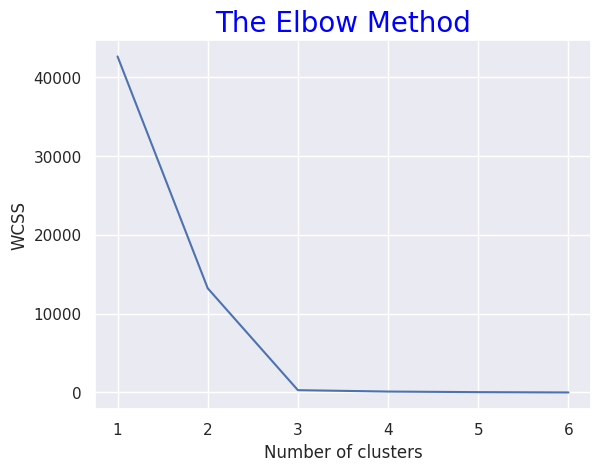

In [ ]:
number_clusters = range(1,7)

plt.plot(number_clusters,wcss)

plt.title('The Elbow Method', size = 20, color = 'blue')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS')

Using the Elbow Method, the best number of clusters is 3